In [1]:
import os
from keras.preprocessing import image
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### load some images

In [3]:
sourcepath = './segmentation_dataset/'
imgpaths = [os.path.join(sourcepath,i) for i in os.listdir(sourcepath)
            if i.endswith('.jpg')]
nimgs = len(imgpaths)
print('numbers of images = ',nimgs)
imgs = [image.load_img(ipath, target_size=(256,256), grayscale=True) for ipath in imgpaths]
print(type(imgs[0]))
print(imgs[0].format)
print(imgs[0].mode)
print(imgs[0].size)

numbers of images =  4
<class 'PIL.Image.Image'>
None
L
(256, 256)


C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [6]:
imgarrays = [image.img_to_array(img) for img in imgs]
print(imgarrays[0].shape)

(256, 256, 1)


(256, 256)


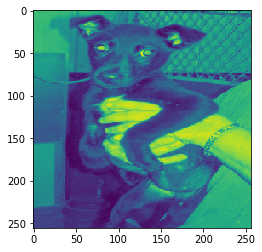

In [35]:
x = imgarrays[0][:, :, 0]
print(x.shape)
plt.imshow(x)

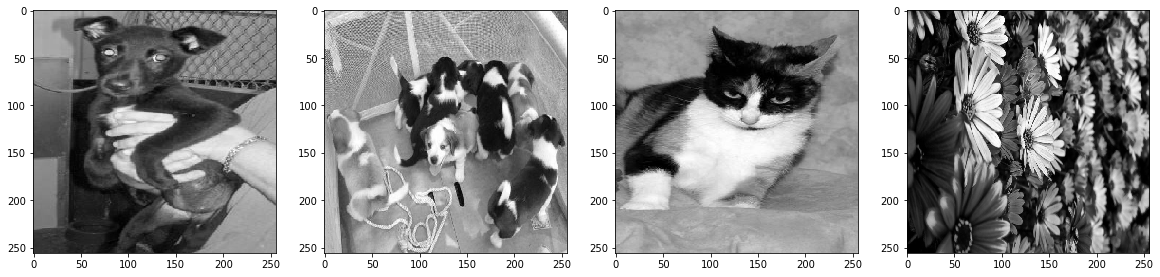

In [7]:
plt.figure(figsize=(20, 10))
for i,img in enumerate(imgs):
    plt.subplot(1, nimgs, i+1)
    plt.imshow(img)

4


C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:595:

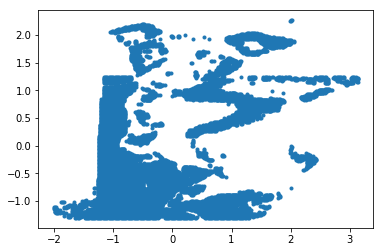

In [44]:
coords = []
for img in imgarrays:
    ys,xs = np.where(img[:,:,0]<50)
    icoords = np.column_stack((xs,img.shape[0]-ys))
    coords.append(StandardScaler().fit_transform(icoords))
print(len(coords))
plt.plot(coords[0][...,0],coords[0][...,1],'.')

In [48]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.07, min_samples=10).fit(coords[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(coords[0], labels))

Estimated number of clusters: 22
Estimated number of noise points: 92
Silhouette Coefficient: -0.188


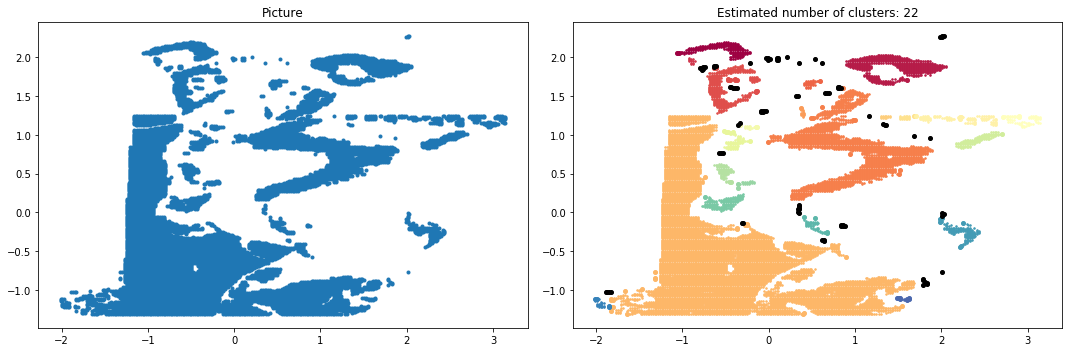

In [50]:
# #############################################################################
# Plot result
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Picture')
plt.plot(coords[0][...,0],coords[0][...,1],'.')
plt.subplot(1, 2, 2)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=3)

    xy = coords[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.tight_layout()
plt.show()